# интернет-магазин «Стримчик»

**В данном проекте надо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

## Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings 

warnings.filterwarnings('ignore')

## Откроем файл с данными и изучим общую информацию

### откроем и посмотрим первые 20 строк 

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### выведем основную информацию

In [3]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(None, (16715, 11))

По выведеной информации видно , что достаточно много пропусков в колонках Critic_Score, User_Score, Rating

Так же не верные типы данных дня колонок User_Score, Year_of_Release их стоит поправить 

## Предобработка данных

### переименуем колонки 

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df.rename(str.lower, axis='columns', inplace=True)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### посмотрим есть ли пропуски и сколько их

In [6]:
df.isna().values.any()

True

#### сколько пропусков в колонках 

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### процентное соотношение пропусков

In [8]:
pd.DataFrame(df.isna().mean().to_frame(name='пропуски'))\
.style.format({'пропуски' : '{:.2%}'})

,пропуски
name,0.01%
platform,0.00%
year_of_release,1.61%
genre,0.01%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
critic_score,51.32%
user_score,40.09%


те колонки , где процент пропусков < 2% можно просто удалить , тк их слишком мало и на общюю картину ни как не повлеяет 

#### удалим строки из колонок со слишком малым кол-вом пропусков

In [9]:
df.dropna(subset=['year_of_release', 'name', 'genre'], inplace=True)

df['year_of_release'].shape[0]

16444

### прообразуем тип данных 

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
# df['user_score'] = df['user_score'].where(df['user_score'] == 'tbd', np.NaN)   не понял , почему не заработало 
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN
df['user_score'].value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1.3      2
0.2      2
0.3      2
9.7      1
0        1
Name: user_score, Length: 95, dtype: int64

In [12]:
df['user_score'] = df['user_score'].astype('float')
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Год не может быть не целым числом , поэтому преобразовал в  int

А оценки не могут быть текстом , поэтому перевел в float

In [13]:
df[(df['genre'] == 'Sports') & (df['platform'] == 'Wii')]['rating'].unique() , df[(df['genre'] == 'Sports')]['rating'].unique()
df[df['name'] == 'Need for Speed: Most Wanted']
x = df[(df['platform'] == 'Wii') & (df['genre'] == 'Platform')]['rating'].unique()
x = pd.Series(x)
list(x.dropna())

['E', 'E10+', 'T']

In [16]:
df['rating'].fillna('Не определен', inplace=True)

убрал все заполнение , тк оно тут не поможет

In [17]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

- Колонки с отзывами я заполнил средним по 2ум колонкам жарн и платформа . Как по мне самый логочный вариант , тк от названий мало что зависит , тк они часто в единичном экземпляре
- колонку с рейтингом возраста раполнил рандомно 3 самыми встречаемыми рейтингами, рейтинги 18+ очень редко встречаются 

### проверим на явные дубликаты 

In [18]:
df.duplicated().values.any()

False

### суммарные продажи во всех регионах

In [19]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Не определен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Не определен,31.38


Что ты не собирать продажи по всем регионам за каждую игру , сделаем сразу новую колонку с суммой

## Исследовательский анализ данных

### сколько игр выпускалось в разные годы

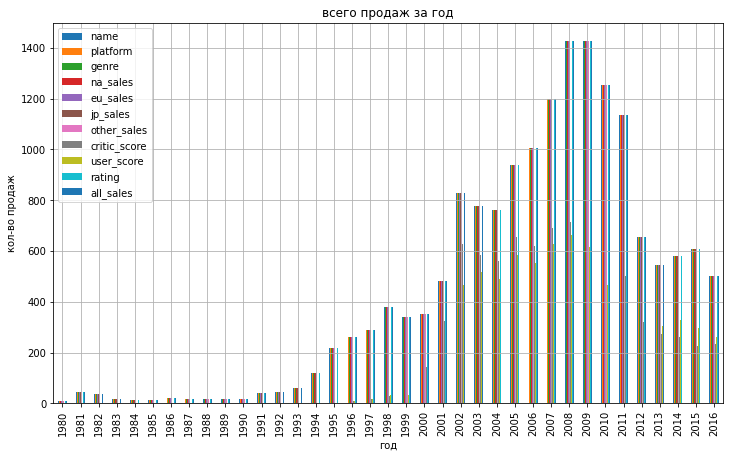

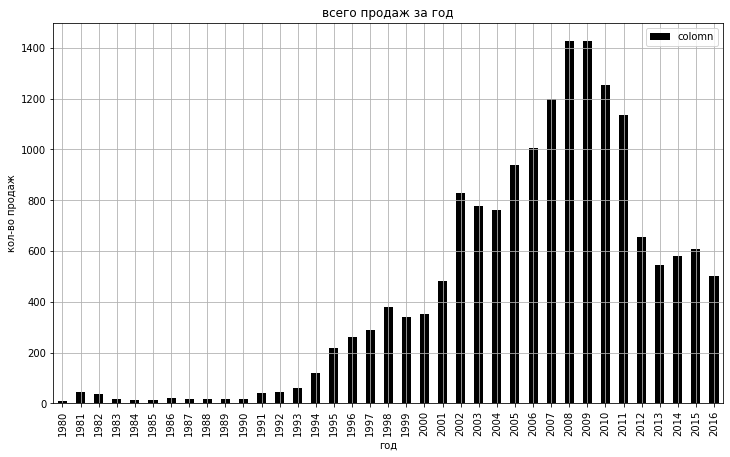

In [20]:
df.groupby('year_of_release').agg('count').sort_values('year_of_release')\
    .plot(kind='bar', figsize=(12, 7), grid=True, title='всего продаж за год')

plt.ylabel('кол-во продаж')
plt.xlabel('год')
plt.show()
# понравилось как выглядит график, очень красочно) ниже вывел по определенному столбцу


df.groupby('year_of_release').agg(colomn=('all_sales','count')).sort_values('year_of_release')\
    .plot(kind='bar', figsize=(12, 7), grid=True, title='всего продаж за год', color='black')

plt.ylabel('кол-во продаж')
plt.xlabel('год')
plt.show()


Можно увидить, что до 1994 выпускали игр меньше 100 в год, такие данные можно отбросить  

### платформы с наибольшими суммарными продажами

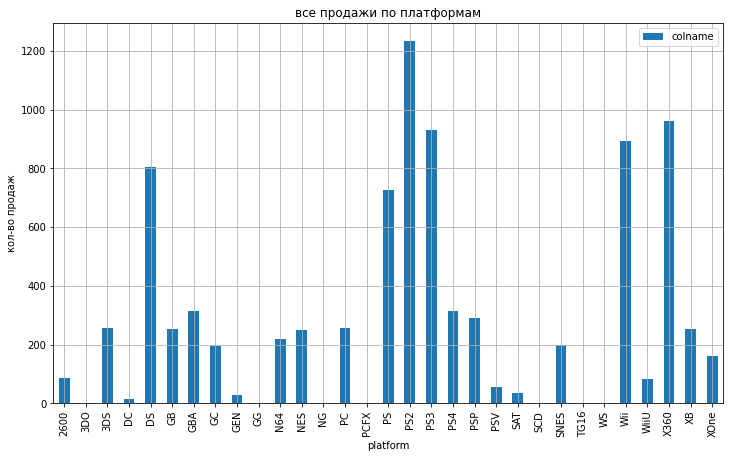

In [21]:
df.groupby(['platform']).agg(colname=('all_sales', 'sum'))\
.plot(kind='bar', figsize=(12, 7), grid=True, title='все продажи по платформам')
plt.ylabel('кол-во продаж')
plt.show()

видно что есть пару явных лидеров по продажам , найдем их и выведем

In [22]:
df.groupby(['platform']).agg(colname=('all_sales', 'sum'))
data = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').reset_index()
data.columns = ['platform', 'sales']
data = data.sort_values('sales', ascending=False).head(7)
data

,platform,sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14


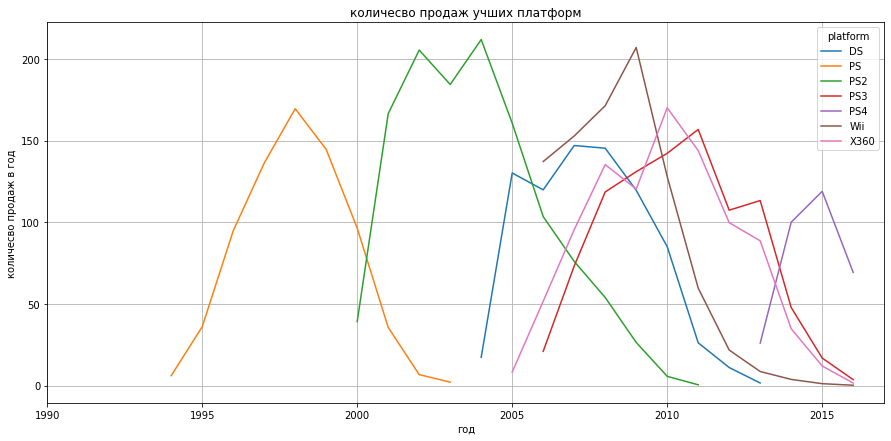

In [23]:
df_1 = df[df['platform'].isin(data['platform'])]
df_1.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum')\
.plot(grid=True, figsize=(15, 7), title='количесво продаж учших платформ')

plt.xlabel('год')
plt.ylabel('количесво продаж в год')
plt.xlim(1990, 2017)
plt.show()

на данном графике можно увидеть когда начались продажи, пик продаж, как долго продавались игры 

In [24]:
a = df.query('''platform in ['DS', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360']''').groupby('platform')['year_of_release'].unique().reset_index()
for i in a['year_of_release']:
    print(f'{len(i)} лет живет консоль')


11 лет живет консоль
10 лет живет консоль
12 лет живет консоль
11 лет живет консоль
4 лет живет консоль
11 лет живет консоль
12 лет живет консоль


- DS 11 лет живет консоль
- PS 10 лет живет консоль
- PS2 12 лет живет консоль
- PS3 11 лет живет консоль
- PS4 4 лет живет консоль
- Wii 11 лет живет консоль
- X360 12 лет живет консоль

    - отсюда можно сделать вывод , что консоли по mean живут примерно 11 лет 

### актуальный период

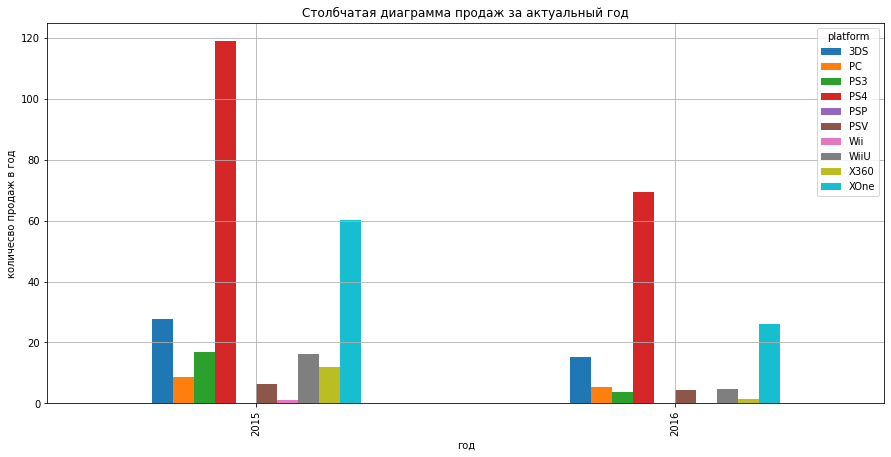

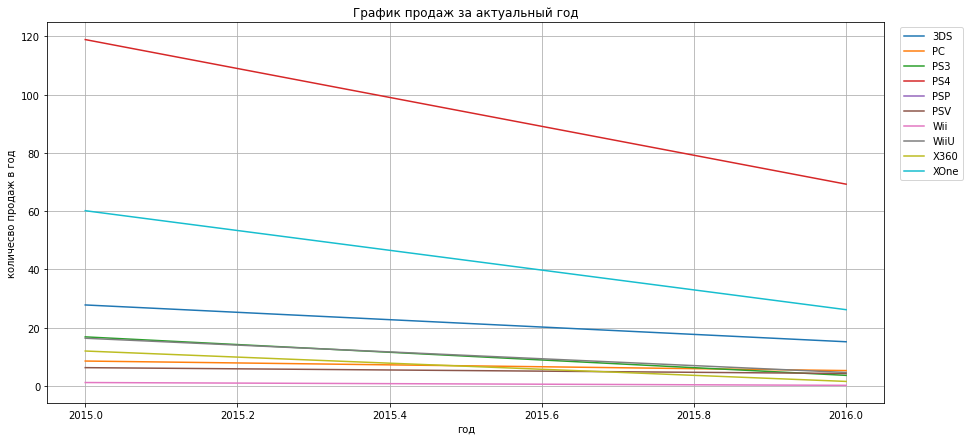

In [25]:
actual_platforms = df.query('''2015 <= year_of_release <= 2017''')

actual_platforms.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum')\
    .plot(kind='bar', grid=True, figsize=(15, 7), title='Столбчатая диаграмма продаж за актуальный год')

plt.xlabel('год')
plt.ylabel('количесво продаж в год')
plt.show()


actual_platforms.pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum')\
    .plot(grid=True, figsize=(15, 7), title='График продаж за актуальный год')

plt.legend(loc='best', bbox_to_anchor=(0.6, 0.5, 0.5, 0.5))
plt.xlabel('год')
plt.ylabel('количесво продаж в год')
plt.show()

- выявили 7 лучших платформ 
    - PS2	
	- X360	
	- PS3	
	- Wii	
	- DS	
	- PS	
	- PS4
- лучше всего продавалась PS2
    - самый высокий пик по количесвту продаж
    - дольше всего продавалась 
- видно , что все платформы к 17 году теряет свок количество продаж , причем достаточно резко (на графиках видно, что с выходом новой версии платформы , старая версия теряет продажи)
    - проподут все платформы кроме:
        - PS4
        - X360
        - 3DS
    - остальные платформы почти не продаются уже в 15 году , в 16 многие пришли к отмеке 0

### «ящик с усами» по глобальным продажам 

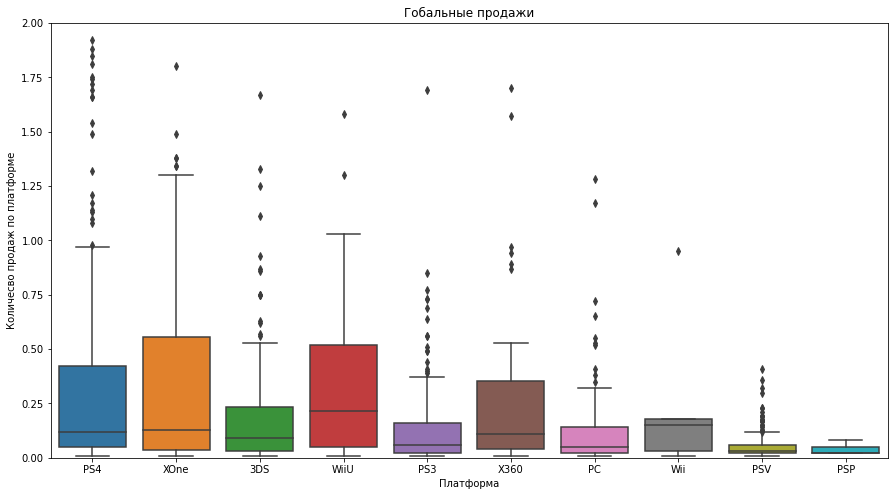

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='platform', y='all_sales', data=actual_platforms)


plt.ylim(0, 2)
plt.title('Гобальные продажи')
plt.xlabel('Платформа')
plt.ylabel('Количесво продаж по платформе')
plt.show()

In [27]:
actual_platforms.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


- почти у всех актуальных платформ на период 15-16 год видно , что много выбросов
- медиана (Q2) у многих платформ очень похожа 
- межквантильный размах больше всего у PS4, XOne, WIIU  они больше всего устойчивы к выбросам
- выбросы это игры корорые стали очень популярны и резко и много продавались

### влияние на продажи от отзывов пользователей и критиков

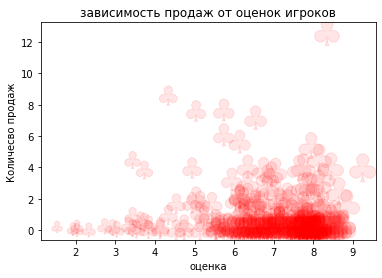

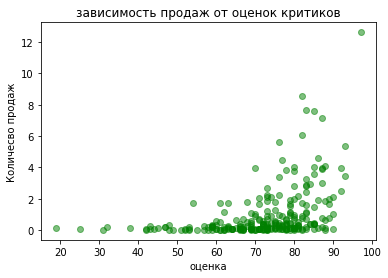

In [28]:
one_popular = df.query(''' platform == 'PS4' ''')
plt.scatter(one_popular['user_score'], one_popular['all_sales'], alpha=0.1,\
                color='r', marker=r'$\clubsuit$', s=one_popular['user_score'] * 100)

plt.title('зависимость продаж от оценок игроков')
plt.xlabel('оценка')
plt.ylabel('Количесво продаж')
plt.show()

plt.scatter(one_popular['critic_score'], one_popular['all_sales'], alpha=0.5, color='g')

plt.title('зависимость продаж от оценок критиков')
plt.xlabel('оценка')
plt.ylabel('Количесво продаж')
plt.show()

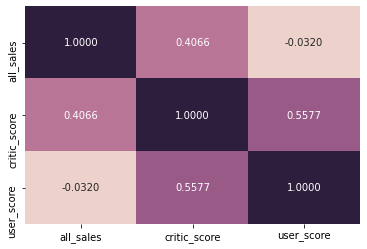

In [29]:
sns.heatmap(one_popular[['all_sales', 'critic_score', 'user_score']].corr(), annot=True\
                , fmt=".4f", cmap=sns.cubehelix_palette(as_cmap=True), cbar=False);

In [30]:
print(f'''корреляция оценок критиков и продаж: {one_popular['all_sales'].corr(one_popular['critic_score'])}''')

корреляция оценок критиков и продаж: 0.406567902061781


In [31]:
print(f'''корреляция оценок игроков и продаж: {abs(one_popular['all_sales'].corr(one_popular['user_score']))}''')

корреляция оценок игроков и продаж: 0.031957110204556376


- отзовы слабо коррелируют с продажами 
    - корреляция с критиками слабо такую корреляцию в большинстве случаев не стоит принимать в расчет
    - корреляция с играками очень слабая такую корреляцию в большинстве случаев не стоит принимать в расчет

###  выводы с продажами игр на других платформах

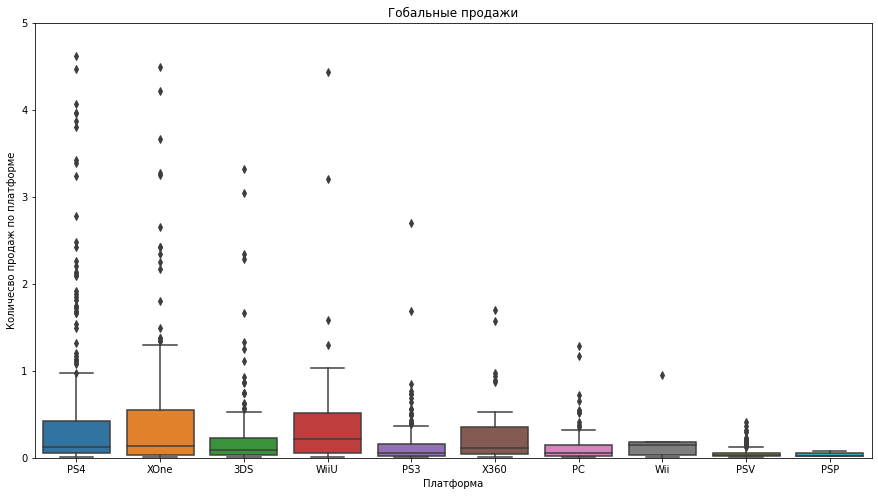

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(x='platform', y='all_sales', data=actual_platforms)


plt.ylim(0, 5)
plt.title('Гобальные продажи')
plt.xlabel('Платформа')
plt.ylabel('Количесво продаж по платформе')
plt.show()

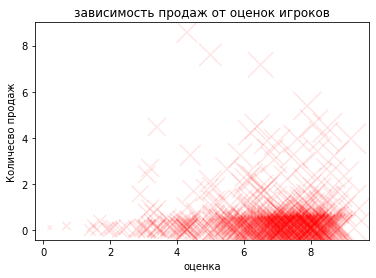

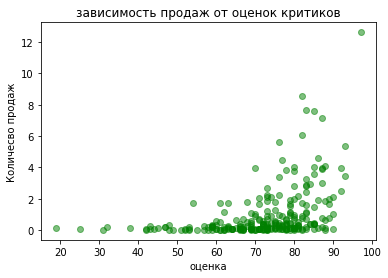

In [33]:
plt.scatter(actual_platforms['user_score'], actual_platforms['all_sales'], alpha=0.1,\
                color='r', marker='x', s=actual_platforms['user_score'] * 100)

plt.title('зависимость продаж от оценок игроков')
plt.xlabel('оценка')
plt.ylabel('Количесво продаж')
plt.show()

plt.scatter(one_popular['critic_score'], one_popular['all_sales'], alpha=0.5, color='g')

plt.title('зависимость продаж от оценок критиков')
plt.xlabel('оценка')
plt.ylabel('Количесво продаж')
plt.show()

In [34]:
actual_platforms.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


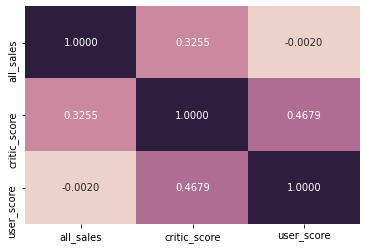

In [35]:
sns.heatmap(actual_platforms[['all_sales', 'critic_score', 'user_score']].corr(), annot=True\
                , fmt=".4f", cmap=sns.cubehelix_palette(as_cmap=True), cbar=False);

- так же как и на популярной консоли , продажа на актуальных платформах ни как не зависят от отзывов
- корреляция с критиками слабо такую корреляцию в большинстве случаев не стоит принимать в расчет
- корреляция с играками слабая такую корреляцию в большинстве случаев не стоит принимать в расчет

- Можем выделить несколько платформ, которые выделяются: PS и PS4 и Xbox One.
- Границы этих платформ высокие, но при всем при этом медиана у всех платформ не выходит за рамки 0.5 млн продаж.
- Можно сделать вывод , что на эти платформы выпустили больше игр и игры которые пользовались спросом 


#### графики отдельно

'PS4'

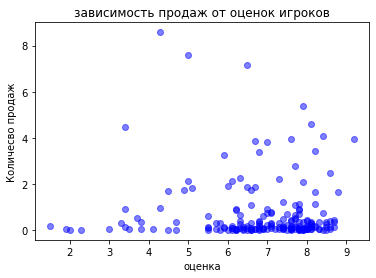

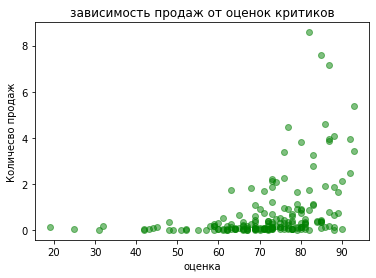

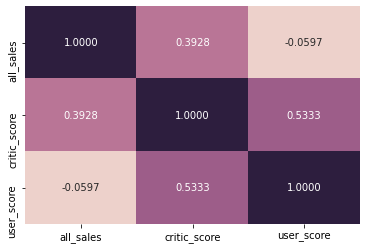

'XOne'

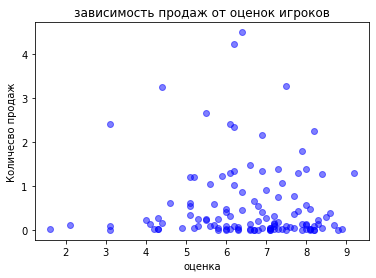

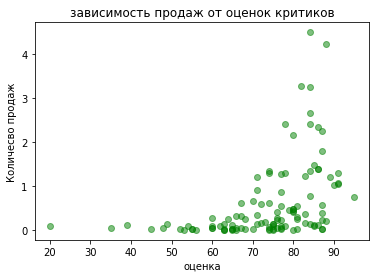

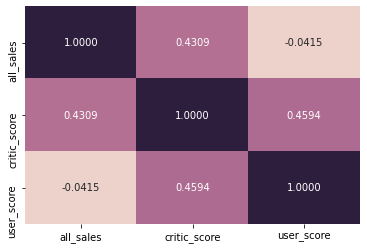

'3DS'

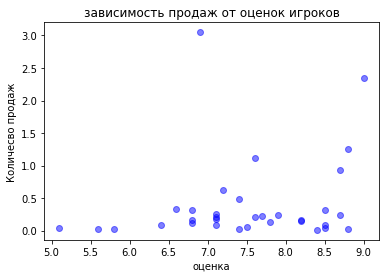

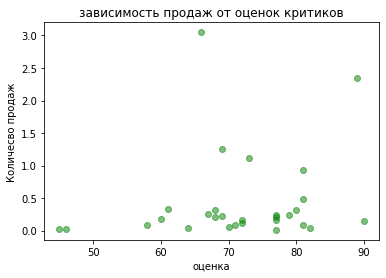

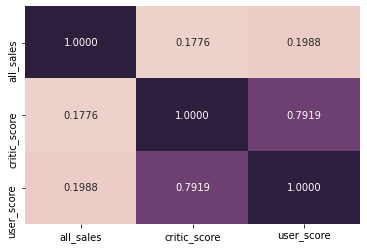

'WiiU'

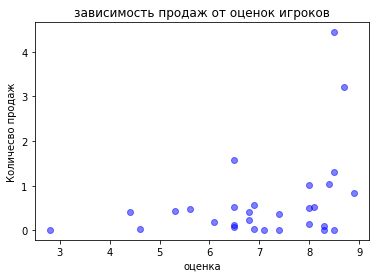

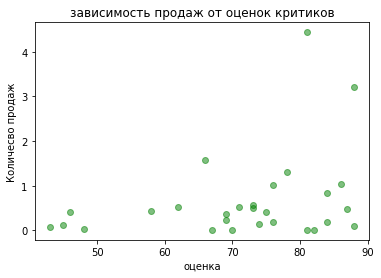

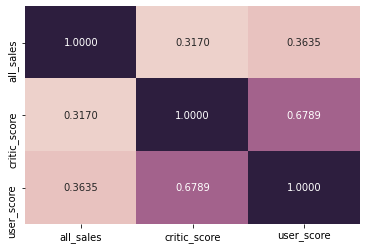

'PS3'

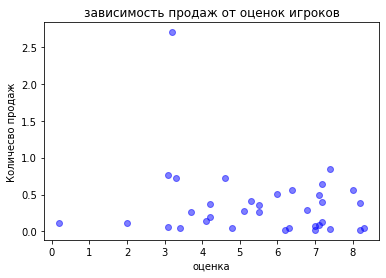

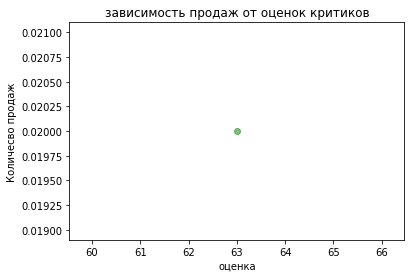

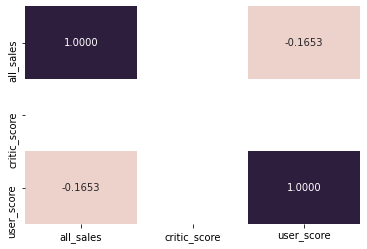

'X360'

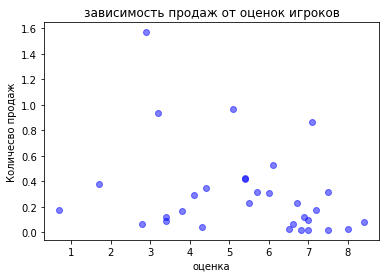

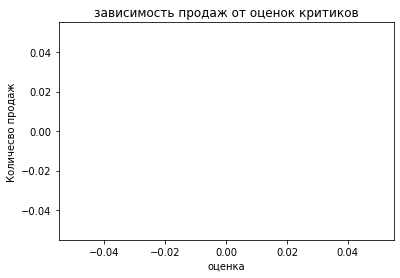

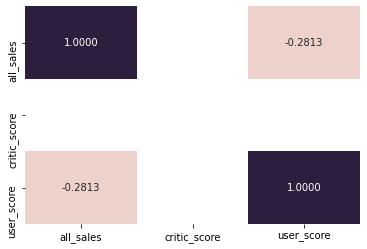

'PC'

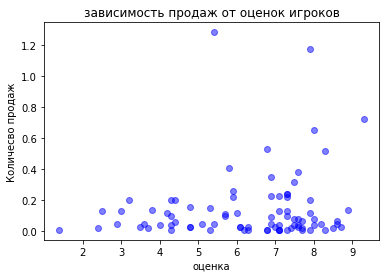

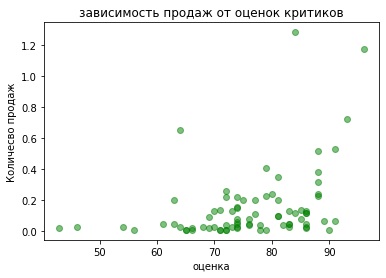

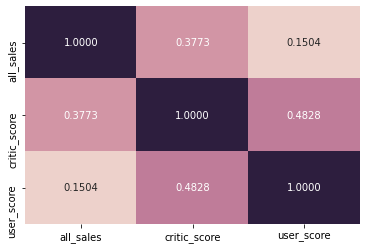

'Wii'

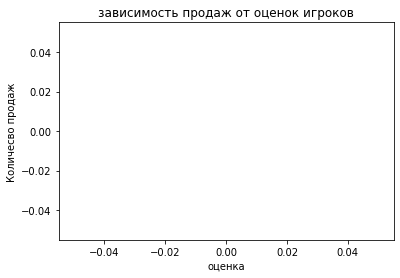

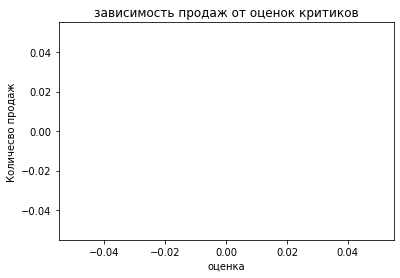

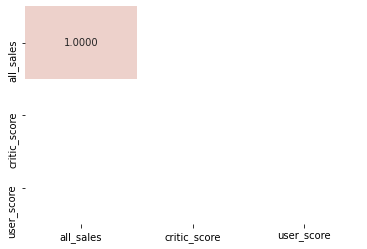

'PSV'

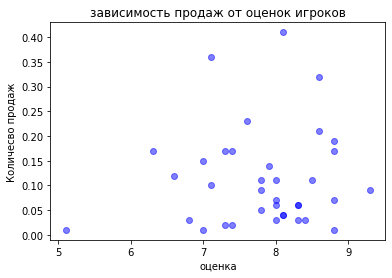

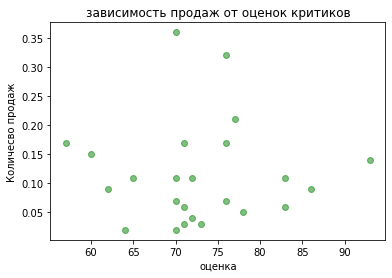

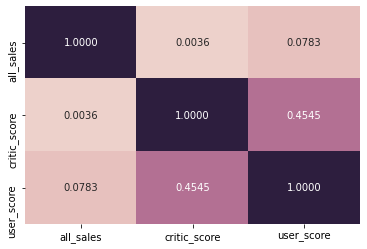

'PSP'

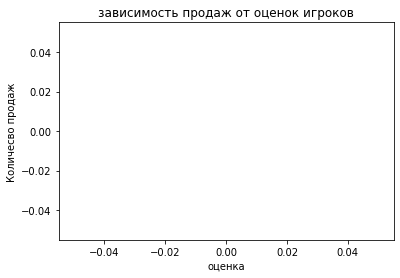

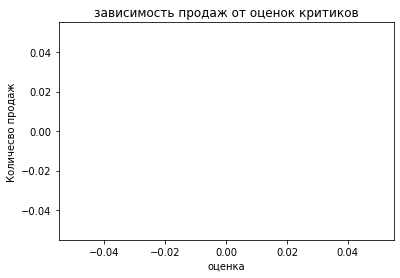

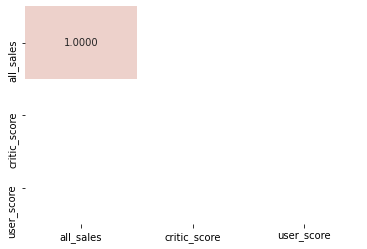

In [36]:
for consol in actual_platforms['platform'].unique():
    display(consol)
    plt.scatter(actual_platforms.query('''platform == @consol''')['user_score'],\
                actual_platforms.query('''platform == @consol''')['all_sales'], alpha=0.5,\
                color='b')

    plt.title('зависимость продаж от оценок игроков')
    plt.xlabel('оценка')
    plt.ylabel('Количесво продаж')
    plt.show()

    plt.scatter(actual_platforms.query('''platform == @consol''')['critic_score'],\
                actual_platforms.query('''platform == @consol''')['all_sales'], alpha=0.5, color='g')

    plt.title('зависимость продаж от оценок критиков')
    plt.xlabel('оценка')
    plt.ylabel('Количесво продаж')
    plt.show()
 
    sns.heatmap(actual_platforms.query('''platform == @consol''')[['all_sales', 'critic_score', 'user_score']].corr(), annot=True\
                , fmt=".4f", cmap=sns.cubehelix_palette(as_cmap=True), cbar=False)
    plt.show()



- в общем мнение о не зависимости продаж от оценок не поменялся , но некоторые данные были пропущены и получились пустые графики

- но нашел одну интересную зависимость , что если платформа не популярна , но идет высокая корреляция и покупатели не популярных платформ часто смотрят отзывы
    - например WiiU, 3DS

### общее распределение игр по жанрам

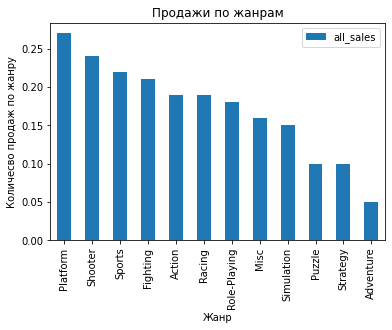

In [37]:
df.pivot_table(index='genre', values='all_sales', aggfunc='median')\
    .reset_index().sort_values('all_sales', ascending=False).plot(kind='bar', x='genre')

plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количесво продаж по жанру')
plt.show()

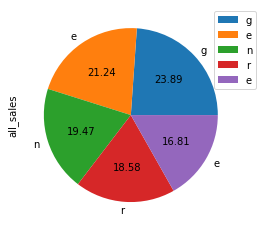

In [38]:
df.pivot_table(index='genre', values='all_sales', aggfunc='median')\
    .reset_index().sort_values('all_sales', ascending=False).head(5)\
        .plot(y='all_sales' ,kind='pie', labels='genre', autopct="%.2f")

plt.legend(loc='best', bbox_to_anchor=(0.6, 0.5, 0.5, 0.5))
plt.show()

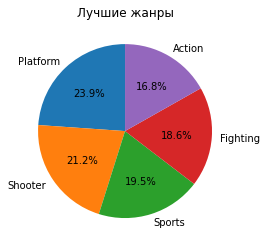

,genre,all_sales
4,Platform,0.27
8,Shooter,0.24
10,Sports,0.22
2,Fighting,0.21
0,Action,0.19


In [39]:
for_pie = df.pivot_table(index='genre', values='all_sales', aggfunc='median')\
    .reset_index().sort_values('all_sales', ascending=False).head(5)

plt.pie(for_pie['all_sales'], labels=for_pie['genre'], autopct='%0.1f%%', startangle=90)

plt.title('Лучшие жанры')
plt.show()

for_pie

- Выделил топ 5 жанров по продажам:
    - Action	
    - Sports	
    - Shooter	
    - Role-Playing	
    - Platform
- но от 5 ого места не сильно отстают еще пару жанров
-  не популярные жанры 
    - Fighting	
    - Simulation	
    - Puzzle	
    - Adventure	
    - Strategy	

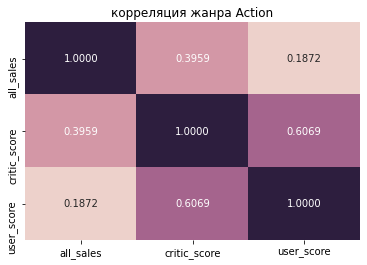

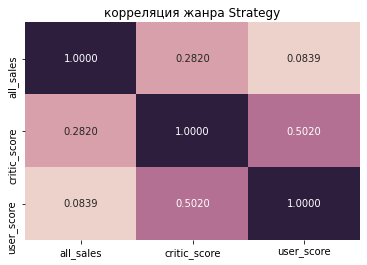

In [40]:
sns.heatmap(df.query(''' genre == 'Action' ''')[['all_sales', 'critic_score', 'user_score']].corr(), annot=True\
                , fmt=".4f", cmap=sns.cubehelix_palette(as_cmap=True), cbar=False)

plt.title('корреляция жанра Action')
plt.show()

sns.heatmap(df.query(''' genre == 'Strategy' ''')[['all_sales', 'critic_score', 'user_score']].corr(), annot=True\
                , fmt=".4f", cmap=sns.cubehelix_palette(as_cmap=True), cbar=False)

plt.title('корреляция жанра Strategy')
plt.show()

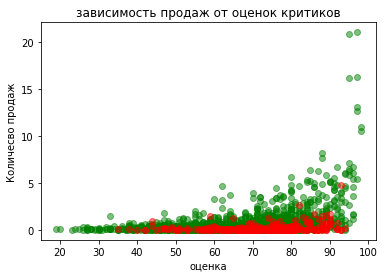

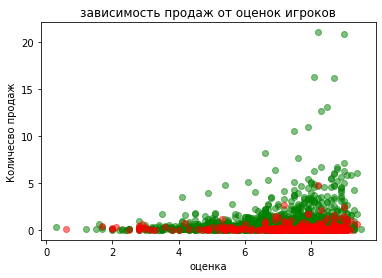

In [41]:
plt.scatter(df.query(''' genre == 'Action' ''')['critic_score'], df.query(''' genre == 'Action' ''')\
                ['all_sales'], alpha=0.5, color='g')
plt.scatter(df.query(''' genre == 'Strategy' ''')['critic_score'], df.query(''' genre == 'Strategy' ''')\
                ['all_sales'], alpha=0.5, color='r')



plt.title('зависимость продаж от оценок критиков')
plt.xlabel('оценка')
plt.ylabel('Количесво продаж')
plt.show()


plt.scatter(df.query(''' genre == 'Action' ''')['user_score'], df.query(''' genre == 'Action' ''')\
                ['all_sales'], alpha=0.5, color='g')
plt.scatter(df.query(''' genre == 'Strategy' ''')['user_score'], df.query(''' genre == 'Strategy' ''')\
                ['all_sales'], alpha=0.5, color='r')


plt.title('зависимость продаж от оценок игроков')
plt.xlabel('оценка')
plt.ylabel('Количесво продаж')
plt.show()

- оценки критиков и игроков не особо влияют на продажи по жанрам 
    - самый продаваемый жанр слабо коррелирует с оценками
    - самый не продаваемый жанр так же не особо зависит от оценок

## Составим портрет пользователя каждого региона

### Лучшие платформы по регионам 

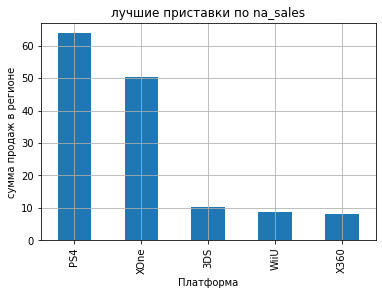

'процент продаж в регионе'

,0
platform,
3DS,4.00%
PS4,20.33%
WiiU,10.78%
X360,0.84%
XOne,31.57%


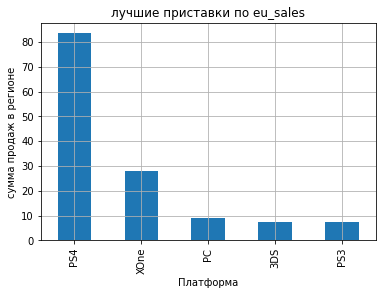

'процент продаж в регионе'

,0
platform,
3DS,2.87%
PC,3.56%
PS3,0.78%
PS4,26.59%
XOne,17.64%


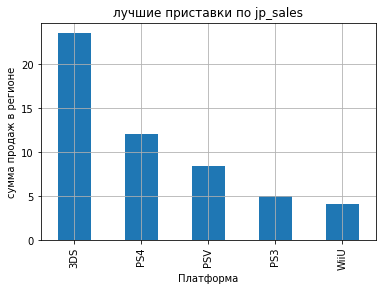

'процент продаж в регионе'

,0
platform,
3DS,9.13%
PS3,0.53%
PS4,3.84%
PSV,15.63%
WiiU,5.01%


In [42]:
all_sales = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

for region in ['na_sales', 'eu_sales', 'jp_sales']:
    actual_platforms.groupby('platform')[region].sum().sort_values(ascending=False).head()\
        .plot(kind='bar', title=f'лучшие приставки по {region}', grid=True)
    plt.xlabel('Платформа')
    plt.ylabel('сумма продаж в регионе')
    plt.show()
    
#     display('процент продаж в регионе', pd.DataFrame((actual_platforms.groupby('platform')[region].sum().sort_values(ascending=False).head()\
#                          / all_sales * 100)\
#             .dropna()).style.format({'0':'{:.2%}'}) ) # не понимаю , почему не выводит через формат %
    display('процент продаж в регионе', pd.DataFrame((actual_platforms.groupby('platform')[region].sum().sort_values(ascending=False).head()
    / all_sales)
    .dropna()).style.format("{:.2%}"))

на удивление во всех регионах совсем разные предпочтения по консолям

на данных графиках можно увидеть какие платформы в каких странах покупают чаще 
- топ 5 NA:
    - X360 	
    - PS2	
	- Wii
	- PS3
    - DS 
- топ 5 EU:
    - PS2
    - Wii
    - X360
    - Wii
    - PS
- топ 5 JP:
    - DS
    - PS
    - PS2
    - SNES
    - 3DS

### Лучшие жанры по регионам 

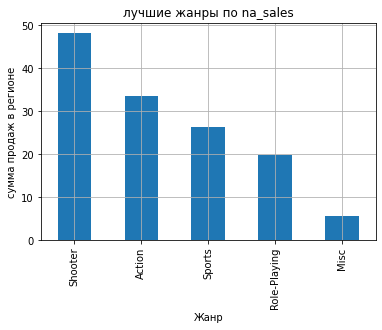

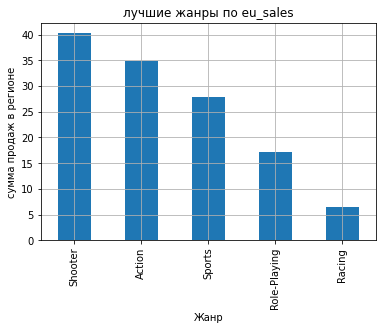

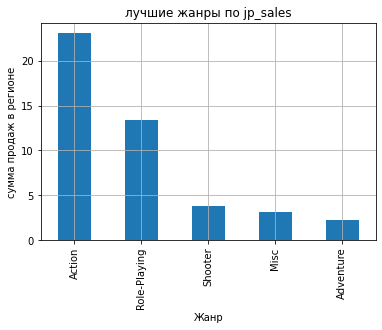

In [43]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    actual_platforms.groupby('genre')[region].sum().sort_values(ascending=False).head()\
        .plot(kind='bar', title=f'лучшие жанры по {region}', grid=True)
    plt.xlabel('Жанр')
    plt.ylabel('сумма продаж в регионе')
    plt.show()

на данных графиках можно увидеть какие жанры в каких странах покупают чаще 
- топ 5 NA:
    - Shooter  	
    - Action 	
	- Sport
	- Role_Playing
    - Misc 
- топ 5 EU:
    - Shooter 	
    - Action	
	- Sport
	- Role_Playing
    - Racing
- топ 5 JP:
    - Action
    - Role_Playing 	
    - Sport	
	- Misc
    - Adventure 

- Жанры в EU и NA почти одинаковые по рейтингу 
- но в Японии совсем другие предпочтения

### Игры какого рейтинга покупают чаще

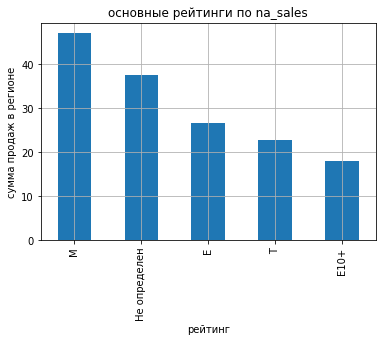

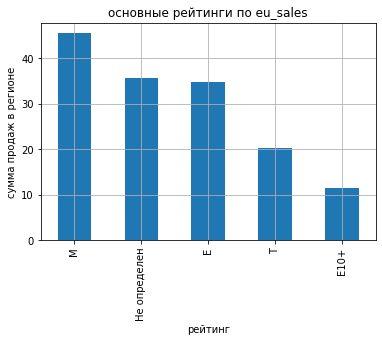

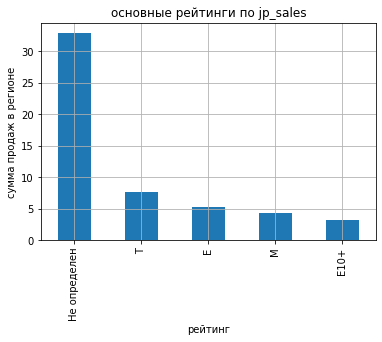

In [44]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    actual_platforms.groupby('rating')[region].sum().sort_values(ascending=False).head()\
        .plot(kind='bar', title=f'основные рейтинги по {region}', grid=True)
    plt.xlabel('рейтинг')
    plt.ylabel('сумма продаж в регионе')
    plt.show()

по данным графикам можно понять , в каких регионах какой рейтинг игр предпочитают

- В Японии вообще не важно для какого возраста игра , видно , что это самый популярный рейтинг)
- Рейтинги ESRB в EU и NA почти одинаковые 

Вывод: в Японии все по другому ))

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H0 
    - средние рейтинги по платформам одинаковые
- H1 
    - средние рейтинги по платформам разные

In [45]:
xbox = actual_platforms[actual_platforms['platform'] == 'XOne']['user_score'].dropna()
pc = actual_platforms[actual_platforms['platform'] == 'PC']['user_score'].dropna()

# критический уровень статистической значимости
alpha = .05 

results = st.ttest_ind(
        xbox,
        pc,
        equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Получается и правда , что XOne и PC любит практический одинаково 

### Средние пользовательские рейтинги жанров Action  и Sports разные

- H0 
    - средние рейтинги по жанрам одинаковые
- H1 
    - средние рейтинги по жанрам разные

In [46]:
action = actual_platforms[actual_platforms['genre'] == 'Action']['user_score'].dropna()
sports = actual_platforms[actual_platforms['genre'] == 'Sports']['user_score'].dropna()

# критический уровень статистической значимости
alpha = .05 

results = st.ttest_ind(
        action,
        sports,
        equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Но Жанры игроки любят совсем по разному , может стоит усилить рекламу на Sports

В данном блоке можно понять , подтверждаем или отвергаем нулевую теорию 

## Вывод

В проекте я сделал: 
- предобработку данных:
    - Правильно назвал колонки , что бы в будущем не было конфликтов по названиям и все было по станлартам 
    - Обработал пропуски:
        - где было возможно заполнил средним 
        - что нельзя было восстановить удалил
    - Преобразовал типы данных , что бы они соответствовали логике
    - Проверил на явные дубли (такие вещи нужно подчищать, если они есть)
    - Добавил колонку общей суммы продаж , что бы не делать это в будущем в ручную каждый раз
- Провел иследовалетьский анализ:
    - Какие годы были самые плодотворные в плане создания игр
    - Как хорошо и как долго продавались платформы 
    - Посмотрел какие платформы еще актуальны (к 2017), что бы их оставить в продаже 
    - Посмотрел межквантильный размах актуальных платформ
    - Провел анализ как влияют отзовы на продажи 
    - Как хорошо продаются игры в зависимости от жанра , выделил топ 5
- Посмотрел продажи по регионам:
    - В зависимости от региона и платформы , где и как продаются игры на платформы 
    - В зависимости от региона и жанра , какие страны в какие жанры любят поиграть
    - В зависимости от региона и рейтинга, как сильно покупатели впадают в детство 
- Проверил гипотезы:
    - Было 2 гипотезы:
        - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
            - но к сожалению нулевая гипотеза была отвергнута и мы приняли первую это значит , что рейтинги не одинаковые
        - редние пользовательские рейтинги жанров Action и Sports разные.
            - но к сожалению нулевая гипотеза была отвергнута и мы приняли первую. это значит , что рейтинги почти одинаковые
        

### совет

В новом году я бы оставил в продаже пару пока ходовых приставок PS4 , XboxOne, 3DS 
остальные платформы будут только убытком 

Так же усилил рекламу по регионам по жанрам , что бы любимые жанры в регионах больше покупали 